# CS3405 Homework 4 DFT and FFT
## Student ID: 103011230 Name: 張子健

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile as sw
import numpy as np
import time
import math
import cmath

In [3]:
vfs, vx = sw.read('violin22k.wav')
gfs, gx = sw.read('gtr-nylon22.wav')
pfs, px = sw.read('pno-cs24k.wav')

In [67]:
v1k = vx[0:2**10]
v4k = vx[0:2**12]
v32k = vx[0:2**15]
g1k = gx[0:2**10]
g4k = gx[0:2**12]
g32k = gx[0:2**15]
p1k = px[0:2**10]
p4k = px[0:2**12]
p32k = px[0:2**15]

In [46]:
def dft(x):
    # the number of point in the signal
    N = len(x)
    X = np.zeros(N, dtype=complex)
    # m/N -> for each fequency (f)
    for m in range(N):
        # n: the nth point in the signal
        for n in range(N):
            X[m] += x[n] * cmath.exp(-1j*2*math.pi*m/N*n)
    return X / N

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for m in range(N):
            x[n] += X[m] * cmath.exp(1j*2*math.pi*m/N*n)
    return x

def fft(x):
    N = len(x)
    Half_N = N // 2
    X = np.zeros(N, dtype = complex)
    if N == 1:
        X[0] = x[0]
    else:
        # from 0th to the last with the step 2
        X_even = fft(x[0::2]) * Half_N
        # from 1st to the last with the step 2
        X_odd = fft(x[1::2]) * Half_N
        for m in range(N):
            X[m] =  X_odd[m%Half_N] * cmath.exp(-1j*2*math.pi*m/N) + X_even[m%Half_N]
    return X / N
        
def ifft(X):
    N = len(X)
    Half_N = N // 2
    x = np.zeros(N, dtype = complex)
    if N == 1:
        x[0] = X[0]
    else:
        x_even = ifft(X[0::2])
        x_odd = ifft(X[1::2])
        for n in range(N):
            x[n] = x_odd[n%Half_N] * cmath.exp(1j*2*math.pi*n/N) + x_even[n%Half_N]
    return x

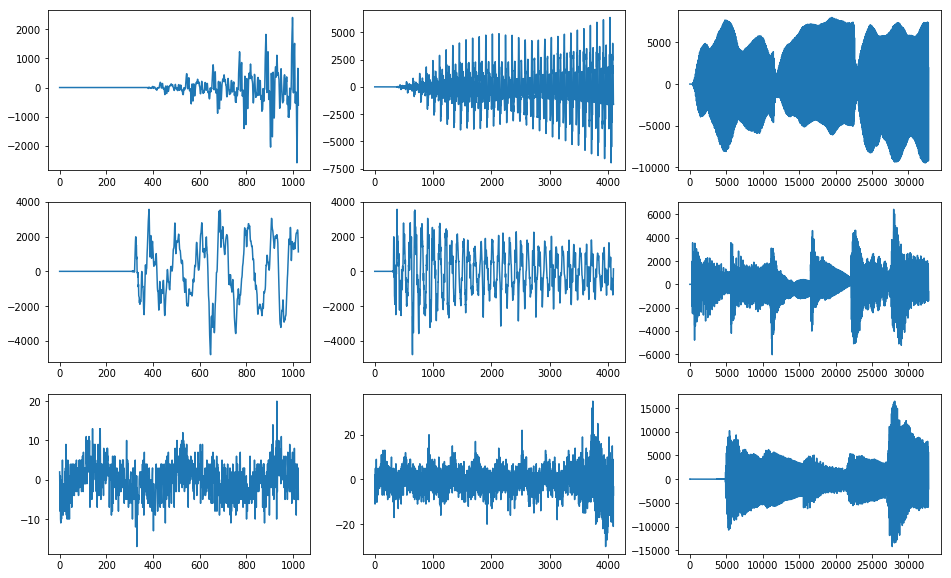

In [22]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.subplot(3,3,1)
plt.plot(v1k)
plt.subplot(3,3,2)
plt.plot(v4k)
plt.subplot(3,3,3)
plt.plot(v32k)
plt.subplot(3,3,4)
plt.plot(g1k)
plt.subplot(3,3,5)
plt.plot(g4k)
plt.subplot(3,3,6)
plt.plot(g32k)
plt.subplot(3,3,7)
plt.plot(p1k)
plt.subplot(3,3,8)
plt.plot(p4k)
plt.subplot(3,3,9)
plt.plot(p32k)

In [112]:
def timing(f, ff, x):
    t = time.perf_counter()
    X = f(x)
    ff(X)
    elapsed_time = time.perf_counter() - t
    return elapsed_time

In [116]:
print("For v1k, run time through DFT-> IDFT = ",timing(dft, idft, v1k), "seconds")
print("For v1k, run time through DFT-> IFFT = ",timing(dft, ifft, v1k), "seconds")
print("For v1k, run time through FFT-> IDFT = ",timing(fft, idft, v1k), "seconds")
print("For v1k, run time through FFT-> IFFT = ",timing(fft, ifft, v1k), "seconds")
print("For v4k, run time through DFT-> IDFT = ",timing(dft, idft, v4k), "seconds")
print("For v4k, run time through DFT-> IFFT = ",timing(dft, ifft, v4k), "seconds")
print("For v4k, run time through FFT-> IDFT = ",timing(fft, idft, v4k), "seconds")
print("For v4k, run time through FFT-> IFFT = ",timing(fft, ifft, v4k), "seconds")
print("For v32k, run time through DFT-> IDFT = ",timing(dft, idft, v32k), "seconds")
print("For v32k, run time through DFT-> IFFT = ",timing(dft, ifft, v32k), "seconds")
print("For v32k, run time through FFT-> IDFT = ",timing(fft, idft, v32k), "seconds")
print("For v32k, run time through FFT-> IFFT = ",timing(fft, ifft, v32k), "seconds")

For v1k, run time through DFT-> IDFT =  4.699257135000153 seconds
For v1k, run time through DFT-> IFFT =  3.457981859000938 seconds
For v1k, run time through FFT-> IDFT =  1.0440397210004448 seconds
For v1k, run time through FFT-> IFFT =  0.03495830800056865 seconds
For v4k, run time through DFT-> IDFT =  71.77571094000086 seconds
For v4k, run time through DFT-> IFFT =  55.03660834600123 seconds
For v4k, run time through FFT-> IDFT =  16.533861955000248 seconds
For v4k, run time through FFT-> IFFT =  0.1564627970001311 seconds
For v32k, run time through DFT-> IDFT =  5193.836476102 seconds
For v32k, run time through DFT-> IFFT =  3641.3228453480006 seconds
For v32k, run time through FFT-> IDFT =  1054.4937898880016 seconds
For v32k, run time through FFT-> IFFT =  1.4685395199994673 seconds


Text(0.5,1,'violin22k')

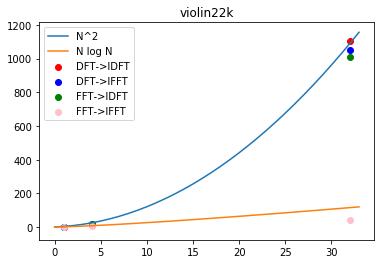

In [119]:
a = lambda x: x **2
b = lambda x: x*np.log(x)
plt.plot(a(np.arange(1,35, 1)), label = 'N^2')
plt.plot(b(np.arange(1,35, 1)), label = 'N log N')
plt.scatter((1,4,32), (4.7/4.7, 71.77/4.7, 5193.8/4.7), label = 'DFT->IDFT', color = 'red')
plt.scatter((1,4,32), (3.46/3.46, 55.04/3.46, 3641.32/3.46), label = 'DFT->IFFT', color = 'blue')
plt.scatter((1,4,32), (1.044/1.044, 16.534/1.044, 1054.5/1.044), label = 'FFT->IDFT', color = 'green')
plt.scatter((1,4,32), (0.035/0.035, 0.1565/0.035, 1.469/0.035), label = 'FFT->IFFT', color = 'pink')
plt.legend(loc='upper left')
plt.title("violin22k")

In [117]:
print("For g1k, run time through DFT-> IDFT = ",timing(dft, idft, g1k), "seconds")
print("For g1k, run time through DFT-> IFFT = ",timing(dft, ifft, g1k), "seconds")
print("For g1k, run time through FFT-> IDFT = ",timing(fft, idft, g1k), "seconds")
print("For g1k, run time through FFT-> IFFT = ",timing(fft, ifft, g1k), "seconds")
print("For g4k, run time through DFT-> IDFT = ",timing(dft, idft, g4k), "seconds")
print("For g4k, run time through DFT-> IFFT = ",timing(dft, ifft, g4k), "seconds")
print("For g4k, run time through FFT-> IDFT = ",timing(fft, idft, g4k), "seconds")
print("For g4k, run time through FFT-> IFFT = ",timing(fft, ifft, g4k), "seconds")
print("For g32k, run time through DFT-> IDFT = ",timing(dft, idft, g32k), "seconds")
print("For g32k, run time through DFT-> IFFT = ",timing(dft, ifft, g32k), "seconds")
print("For g32k, run time through FFT-> IDFT = ",timing(fft, idft, g32k), "seconds")
print("For g32k, run time through FFT-> IFFT = ",timing(fft, ifft, g32k), "seconds")

For g1k, run time through DFT-> IDFT =  4.924405107998609 seconds
For g1k, run time through DFT-> IFFT =  3.718598409999686 seconds
For g1k, run time through FFT-> IDFT =  1.0465167949987517 seconds
For g1k, run time through FFT-> IFFT =  0.03506901200307766 seconds
For g4k, run time through DFT-> IDFT =  76.0350238079991 seconds
For g4k, run time through DFT-> IFFT =  59.199520207002934 seconds
For g4k, run time through FFT-> IDFT =  17.41918668300059 seconds
For g4k, run time through FFT-> IFFT =  0.15669191399865667 seconds
For g32k, run time through DFT-> IDFT =  4675.96837382 seconds
For g32k, run time through DFT-> IFFT =  3686.1867601039994 seconds
For g32k, run time through FFT-> IDFT =  1077.7049671589994 seconds
For g32k, run time through FFT-> IFFT =  1.4915852329977497 seconds


Text(0.5,1,'gtr-nylon22')

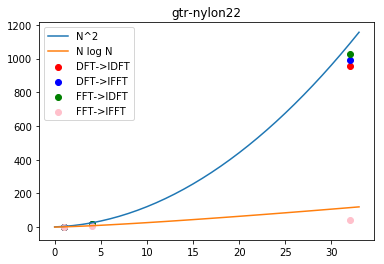

In [120]:
a = lambda x: x **2
b = lambda x: x*np.log(x)
plt.plot(a(np.arange(1,35, 1)), label = 'N^2')
plt.plot(b(np.arange(1,35, 1)), label = 'N log N')
plt.scatter((1,4,32), (4.9/4.9, 76.035/4.9, 4675.968/4.9), label = 'DFT->IDFT', color = 'red')
plt.scatter((1,4,32), (3.718/3.718, 59.199/3.718, 3686.186/3.718), label = 'DFT->IFFT', color = 'blue')
plt.scatter((1,4,32), (1.0465/1.0465, 17.419/1.0465, 1077.7/1.0465), label = 'FFT->IDFT', color = 'green')
plt.scatter((1,4,32), (0.035/0.035, 0.1567/0.035, 1.4916/0.035), label = 'FFT->IFFT', color = 'pink')
plt.legend(loc='upper left')
plt.title("gtr-nylon22")

In [118]:
print("For p1k, run time through DFT-> IDFT = ",timing(dft, idft, p1k), "seconds")
print("For p1k, run time through DFT-> IFFT = ",timing(dft, ifft, p1k), "seconds")
print("For p1k, run time through FFT-> IDFT = ",timing(fft, idft, p1k), "seconds")
print("For p1k, run time through FFT-> IFFT = ",timing(fft, ifft, p1k), "seconds")
print("For p4k, run time through DFT-> IDFT = ",timing(dft, idft, p4k), "seconds")
print("For p4k, run time through DFT-> IFFT = ",timing(dft, ifft, p4k), "seconds")
print("For p4k, run time through FFT-> IDFT = ",timing(fft, idft, p4k), "seconds")
print("For p4k, run time through FFT-> IFFT = ",timing(fft, ifft, p4k), "seconds")
print("For p32k, run time through DFT-> IDFT = ",timing(dft, idft, p32k), "seconds")
print("For p32k, run time through DFT-> IFFT = ",timing(dft, ifft, p32k), "seconds")
print("For p32k, run time through FFT-> IDFT = ",timing(fft, idft, p32k), "seconds")
print("For p32k, run time through FFT-> IFFT = ",timing(fft, ifft, p32k), "seconds")

For p1k, run time through DFT-> IDFT =  4.541718222000782 seconds
For p1k, run time through DFT-> IFFT =  3.462057075001212 seconds
For p1k, run time through FFT-> IDFT =  1.1072347630033619 seconds
For p1k, run time through FFT-> IFFT =  0.04108352899856982 seconds
For p4k, run time through DFT-> IDFT =  75.24109478699756 seconds
For p4k, run time through DFT-> IFFT =  60.881659164002485 seconds
For p4k, run time through FFT-> IDFT =  17.855759661000775 seconds
For p4k, run time through FFT-> IFFT =  0.15883547400153475 seconds
For p32k, run time through DFT-> IDFT =  4735.269060315997 seconds
For p32k, run time through DFT-> IFFT =  3536.874713293997 seconds
For p32k, run time through FFT-> IDFT =  1055.954219666004 seconds
For p32k, run time through FFT-> IFFT =  1.4608399369972176 seconds


Text(0.5,1,'pno-cs24k')

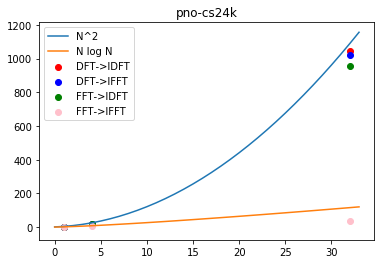

In [121]:
a = lambda x: x **2
b = lambda x: x*np.log(x)
plt.plot(a(np.arange(1,35, 1)), label = 'N^2')
plt.plot(b(np.arange(1,35, 1)), label = 'N log N')
plt.scatter((1,4,32), (4.542/4.542, 75.241/4.542, 4735.269/4.542), label = 'DFT->IDFT', color = 'red')
plt.scatter((1,4,32), (3.462/3.462, 60.882/3.462, 3536.87/3.462), label = 'DFT->IFFT', color = 'blue')
plt.scatter((1,4,32), (1.107/1.107, 17.856/1.107, 1055.95/1.107), label = 'FFT->IDFT', color = 'green')
plt.scatter((1,4,32), (0.041/0.041, 0.159/0.041, 1.461/0.041), label = 'FFT->IFFT', color = 'pink')
plt.legend(loc='upper left')
plt.title("pno-cs24k")

### Generally, for either DFT or FFT, the variance between the three sound files are negligible. 
### Particularily, all of them are in good agreement with the theoretical complexity. While either DFT or IDFT are present, it dominates the computational complexity (over FFT or IFFT).

Text(0.5,1,'p32k')

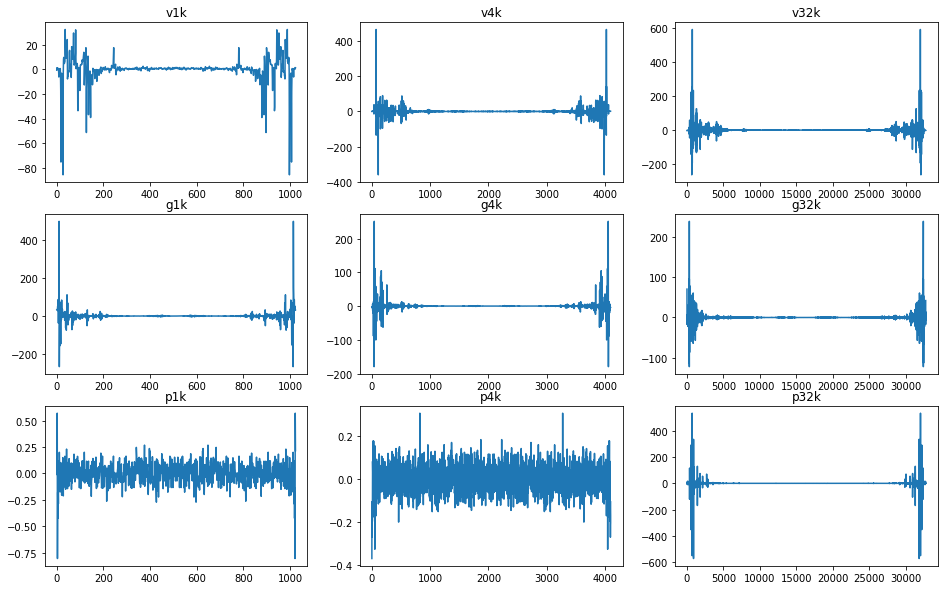

In [128]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.subplot(3,3,1)
plt.plot(fft(v1k).real)
plt.title("v1k")
plt.subplot(3,3,2)
plt.plot(fft(v4k).real)
plt.title("v4k")
plt.subplot(3,3,3)
plt.plot(fft(v32k).real)
plt.title("v32k")
plt.subplot(3,3,4)
plt.plot(fft(g1k).real)
plt.title("g1k")
plt.subplot(3,3,5)
plt.plot(fft(g4k).real)
plt.title("g4k")
plt.subplot(3,3,6)
plt.plot(fft(g32k).real)
plt.title("g32k")
plt.subplot(3,3,7)
plt.plot(fft(p1k).real)
plt.title("p1k")
plt.subplot(3,3,8)
plt.plot(fft(p4k).real)
plt.title("p4k")
plt.subplot(3,3,9)
plt.plot(fft(p32k).real)
plt.title("p32k")